In [1]:
!pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
data=pd.read_csv('predict_energy_consumption.csv')
data.head()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013257,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418
3,29.966462,63.933493,4.990924,662.386690,119.254957
4,18.900466,68.393669,5.438995,614.571385,117.162261


In [9]:
X=data[['temperature','humidity','wind_speed','solar_irradiance']].values
y=data['energy_consumption'].values

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [13]:
model=Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
    Dense(32,activation='relu'),
    Dense(1)
])

C:\Users\maker\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [16]:
history=model.fit(X_train,y_train,epochs=50,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 92482.0391 - mae: 275.8668 - val_loss: 83539.5078 - val_mae: 258.6978
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 94733.8281 - mae: 280.1454 - val_loss: 82936.4375 - val_mae: 257.5167
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 88881.7266 - mae: 269.3499 - val_loss: 82006.5156 - val_mae: 255.6905
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 84901.0781 - mae: 262.6082 - val_loss: 80586.1875 - val_mae: 252.8740
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 81994.6562 - mae: 256.0346 - val_loss: 78505.3984 - val_mae: 248.6960
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 81668.6406 - mae: 257.0444 - val_loss: 75553.7266 - val_mae: 242.6386
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 80747.8828 - mae: 253.0731 - val_loss: 71581.4297 - val_mae: 234.2347
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 78904.0312 - mae: 249.3943 - val_loss: 66594.

In [17]:
test_loss,test_mae=model.evaluate(X_test,y_test,verbose=1)
print(f"Test Mean absolute Error:{test_mae:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18062.5449 - mae: 115.2214  
Test Mean absolute Error:115.47


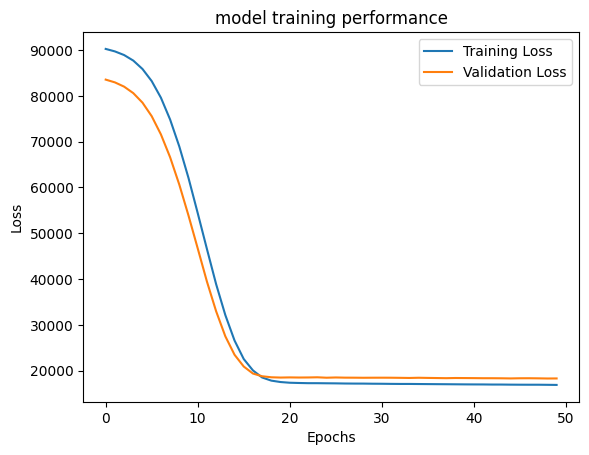

In [22]:
plt.plot(history.history['loss'],label=['Training Loss'])
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('model training performance')
plt.legend()
plt.show()

In [23]:
predictions=model.predict(X_test)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


array([[291.45074],
       [249.6394 ],
       [249.03516],
       [208.19023],
       [348.5724 ],
       [306.29144],
       [314.36365],
       [289.52963],
       [296.51462],
       [273.20557],
       [239.8468 ],
       [255.81088],
       [283.21896],
       [233.27505],
       [291.28232],
       [316.56042],
       [261.19278],
       [317.8935 ],
       [298.25946],
       [253.09082],
       [272.07422],
       [290.6255 ],
       [282.2931 ],
       [275.68457],
       [253.8012 ],
       [246.19695],
       [263.43423],
       [320.97076],
       [311.02567],
       [266.6267 ],
       [234.44254],
       [304.10822],
       [294.8213 ],
       [268.0607 ],
       [318.81586],
       [291.65845],
       [213.84177],
       [254.32716],
       [287.83234],
       [237.43588],
       [245.01454],
       [254.80817],
       [255.44603],
       [253.8441 ],
       [273.34476],
       [253.66776],
       [255.7298 ],
       [252.7757 ],
       [296.2656 ],
       [293.7435 ],


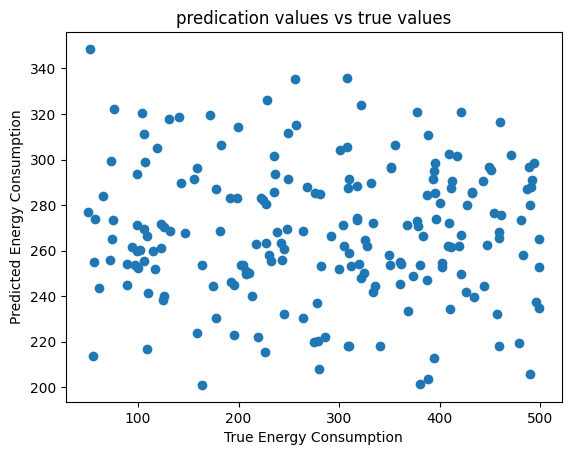

In [26]:
plt.scatter(y_test,predictions)
plt.xlabel('True Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('predication values vs true values')
plt.show()